<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP3/TP3_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

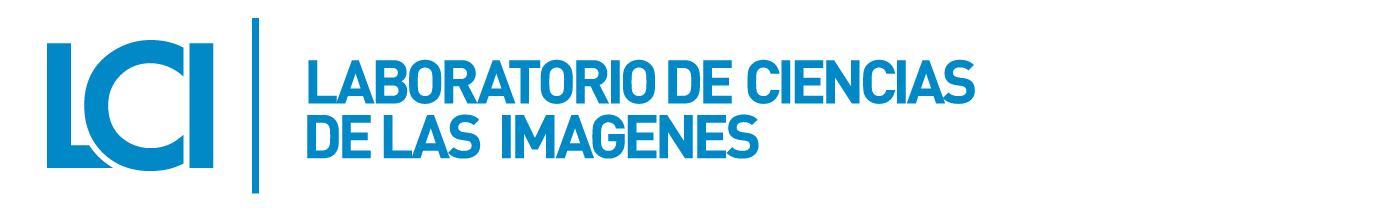

#Práctica 3: Ecuación logística

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar un aplicativo que permita visualizar el diagrama de trayectorias, diagrama de fases y diagrama de estabilidad de la ecuación logística
## Objetivos Específicos
*   Desarrollar aplicativos que permita visualizar las tres vistas de la ecuación logística
*   Desarrollar una etapa de selección de valores por parte del usuario
*   Visualizar los resultados

###Problema
Implementar las tres “vistas” de la ecuación logística mostradas en la materia
(trayectorias, diagrama de fases, diagrama de estabilidad) con una 
cantidad “razonable” de accionables.

##Desarrollo
El desarrollo se divide en 2 etapas, la primera tiene como objetivo la computación de la ecuación logística para el diagrama de trayectoria y diagrama de estabilidad, en 2 ecuaciones.  En la segunda etapa, se traza el diagrama de fases en una sola ecuación.

In [2]:
#Lectura de librerías
import matplotlib.pyplot as plt
from math import sin

###Diagrama de trayectoria y diagrama de estabilidad ecuación 1

*Ec. 1.
          x<sub>i+1</sub> = rx<sub>i</sub>(1 - x<sub>i</sub>)*

donde: 


*   x<sub>i</sub> = factor logistico (Población)
*   r = constante de crecimiento (val_r)


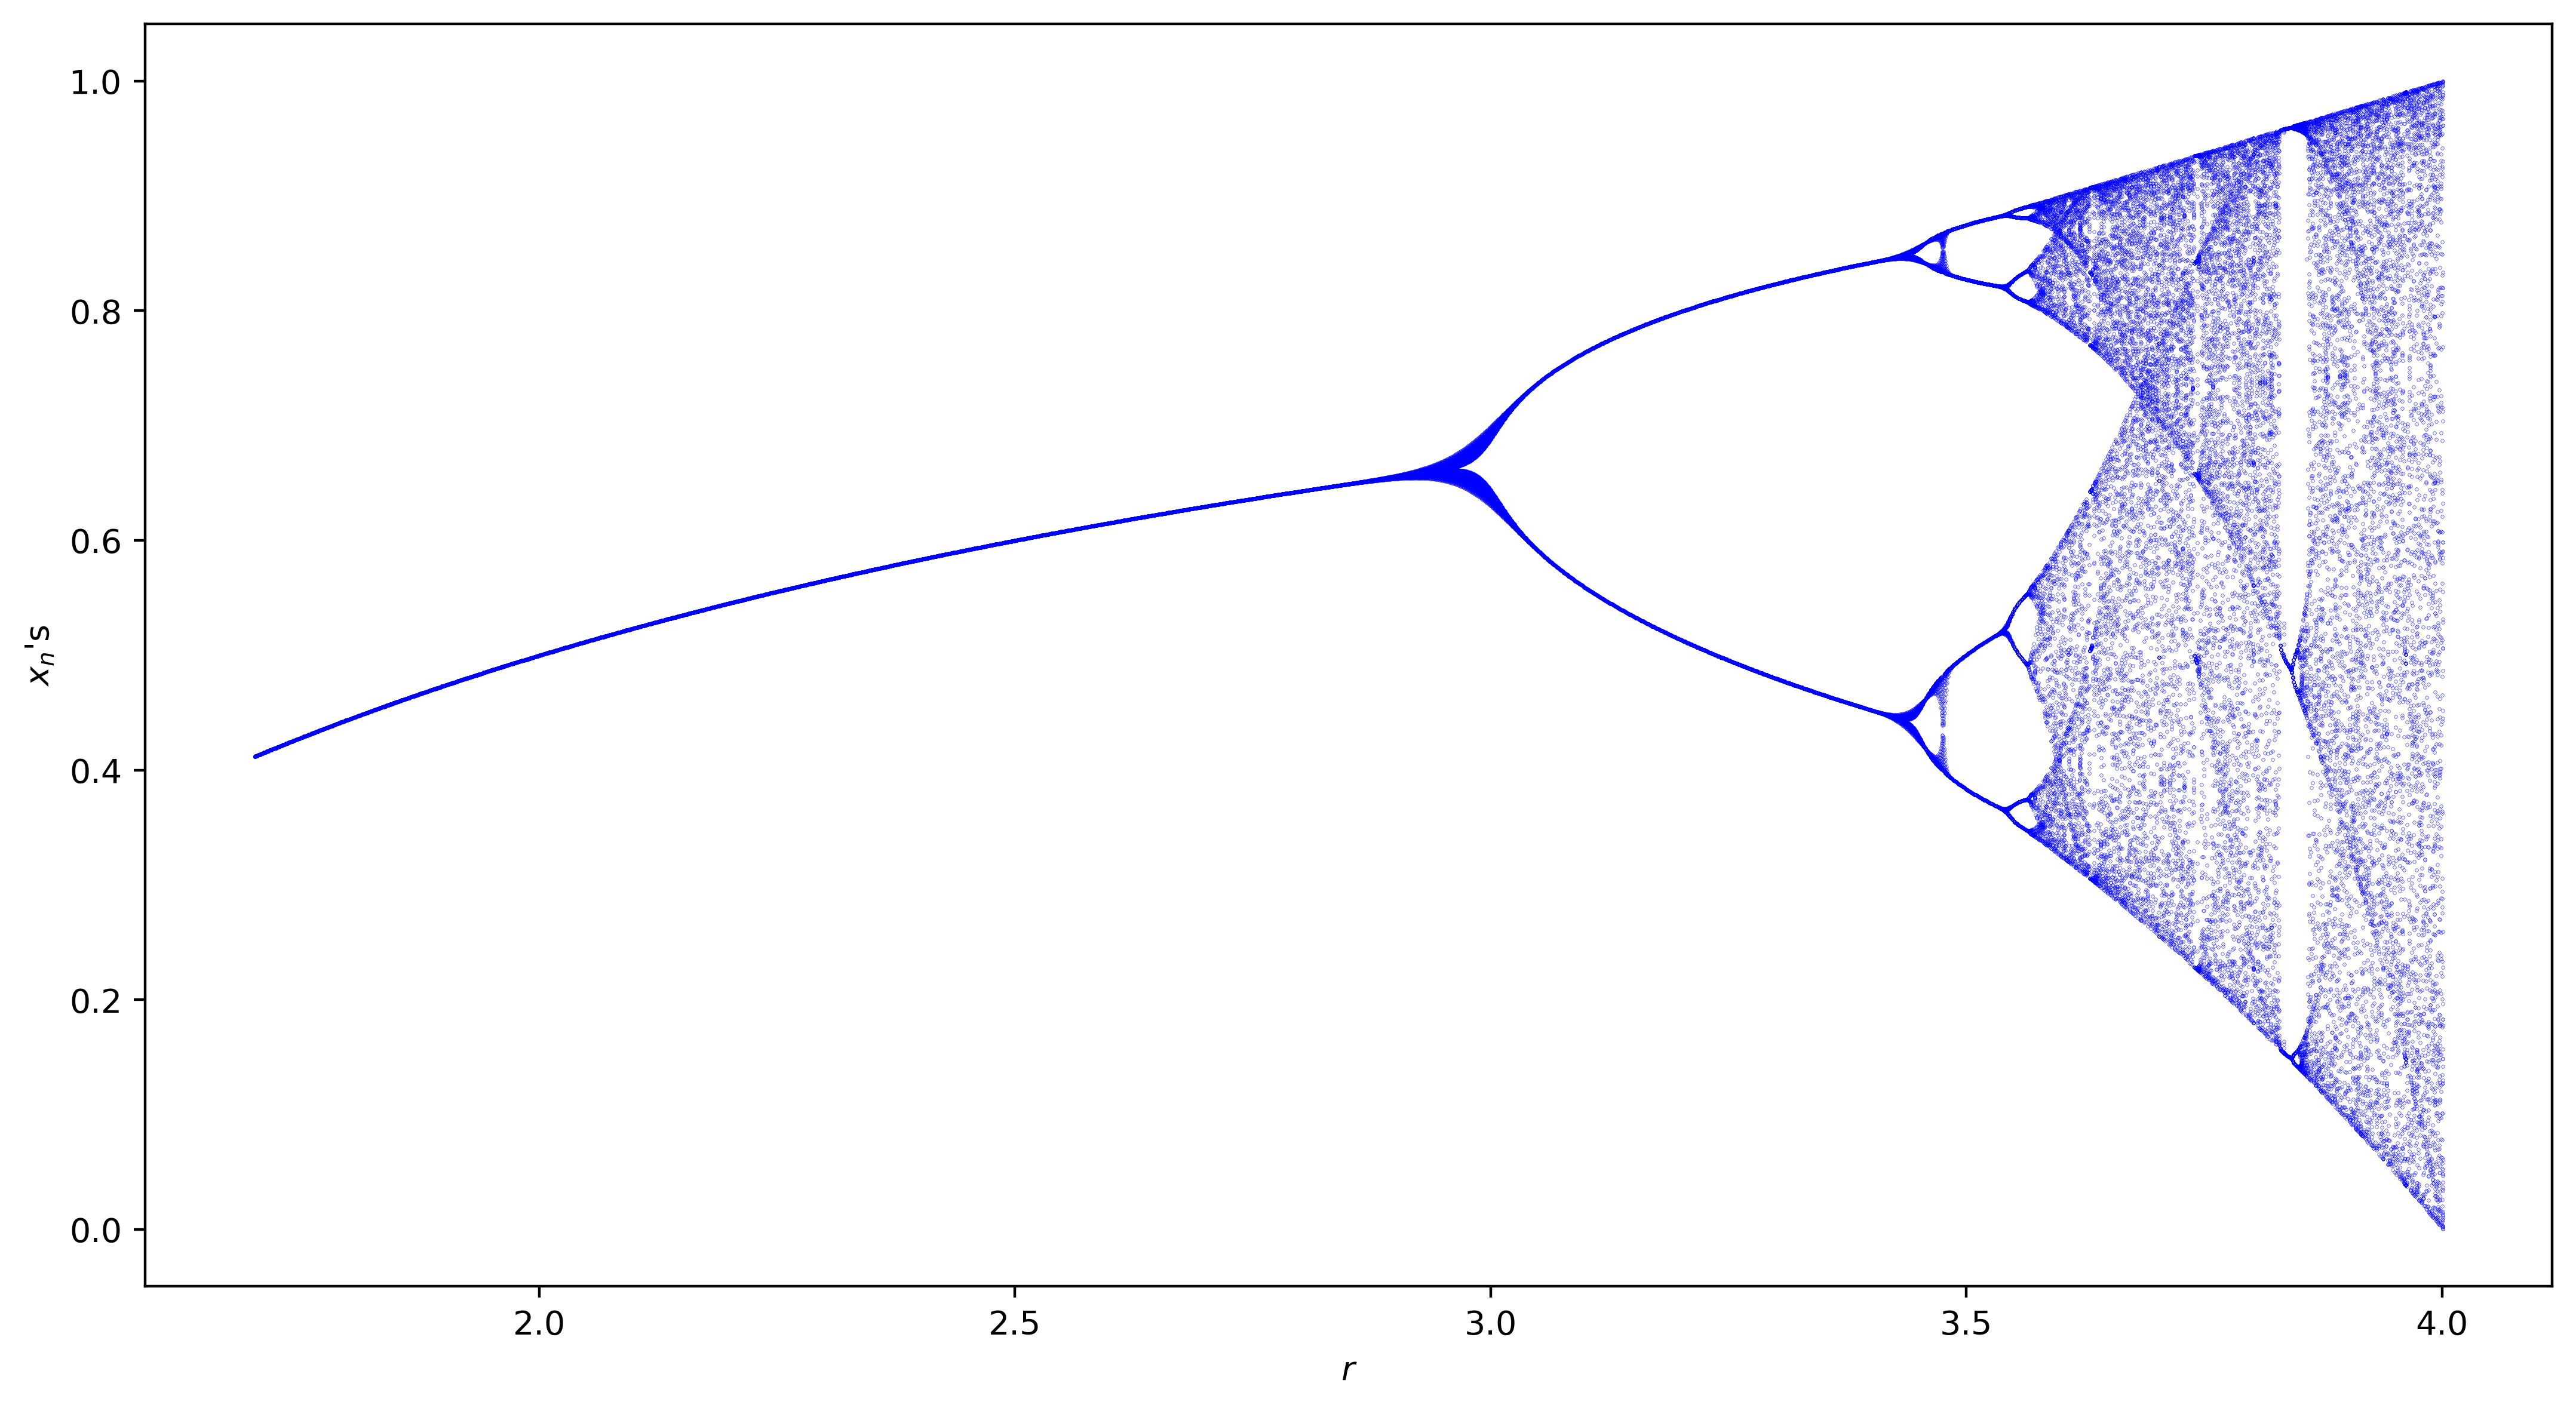

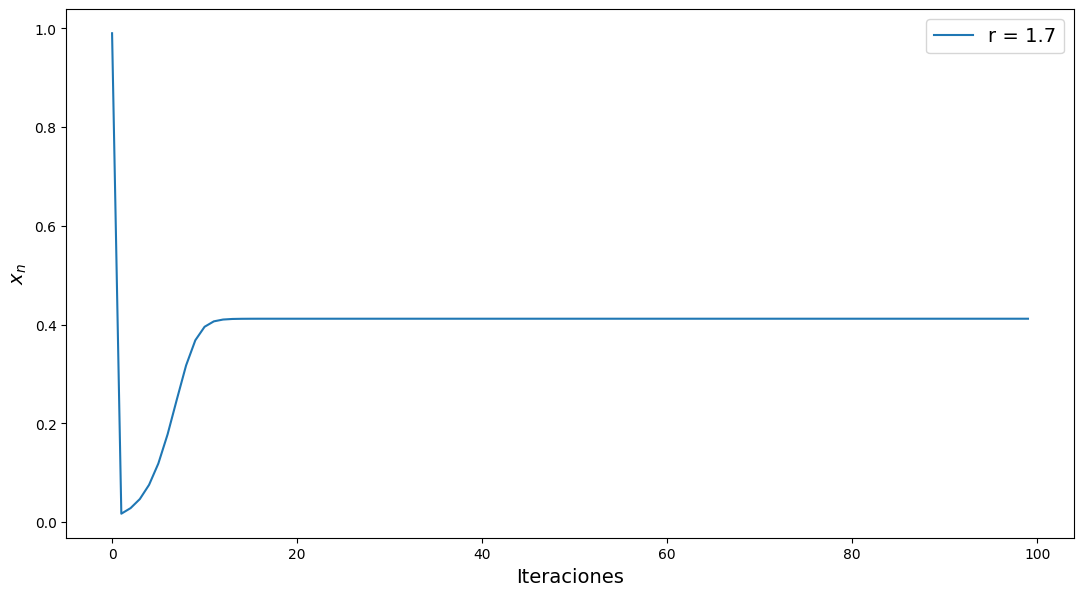

In [3]:
#@title Selección de valores{ run: "auto" }
Población = 0.99 #@param {type:"slider", min:0, max:1, step:0.01}
val_r = 1.7 #@param {type:"slider", min:0, max:4, step:0.1}
interactions = 100 #@param {type:"slider", min:100, max:10000, step:100}


x0=Población  #Población inicial
n=interactions  #Número total de iteraciones
ultimos=60   #Términos que consideraremos para checar hacia donde converge la sucesión.

r=val_r
fig=plt.figure(figsize=(13,7), dpi=400)

while r<4: 
    xns=[x0]   #Lista donde se guardan los elementos de la sucesión.
    for i in range(n):
        xns.append(r*xns[i]*(1-xns[i]))
    r+=0.001
    xfinales=xns[n-ultimos:]    #Los ultimos 60 valores de la sucesión.
    rs=[r for xs in xfinales]    #Una lista con el valor de r actual repetido 60 veces.
    plt.scatter(rs, xfinales, c='b', marker='o', s=0.01)

  
plt.xlabel('$r$', fontsize=10)
plt.ylabel('$x_n$\'s ', fontsize=10)
plt.savefig('diagrama_estabilidad_ec1.png')
plt.show()

#Diagrama de trayectorias
x0=Población  
n=interactions  
r=val_r

fig=plt.figure(figsize=(13,7), dpi=100)
ordenadas=range(n)

xns=[x0]
for i in range(n-1):
  xns.append(r*xns[i]*(1-xns[i]))

plt.plot(ordenadas, xns, label=f'r = {r}')
plt.xlabel('Iteraciones', fontsize=14)
plt.ylabel('$x_n$', fontsize=14)
plt.legend(fontsize=14)
plt.savefig('diagrama_trayectoria_ec1.png')
plt.show()

###Diagrama de trayectoria y diagrama de estabilidad ecuación 2

*Ec. 2.
  x<sub>i+1</sub> = (r<sub>i</sub>/4)sen(3.1416 ( r<sub>i</sub>))*

donde: 


*   x<sub>i</sub> = factor logistico (Población)
*   r = constante de crecimiento (val_r)

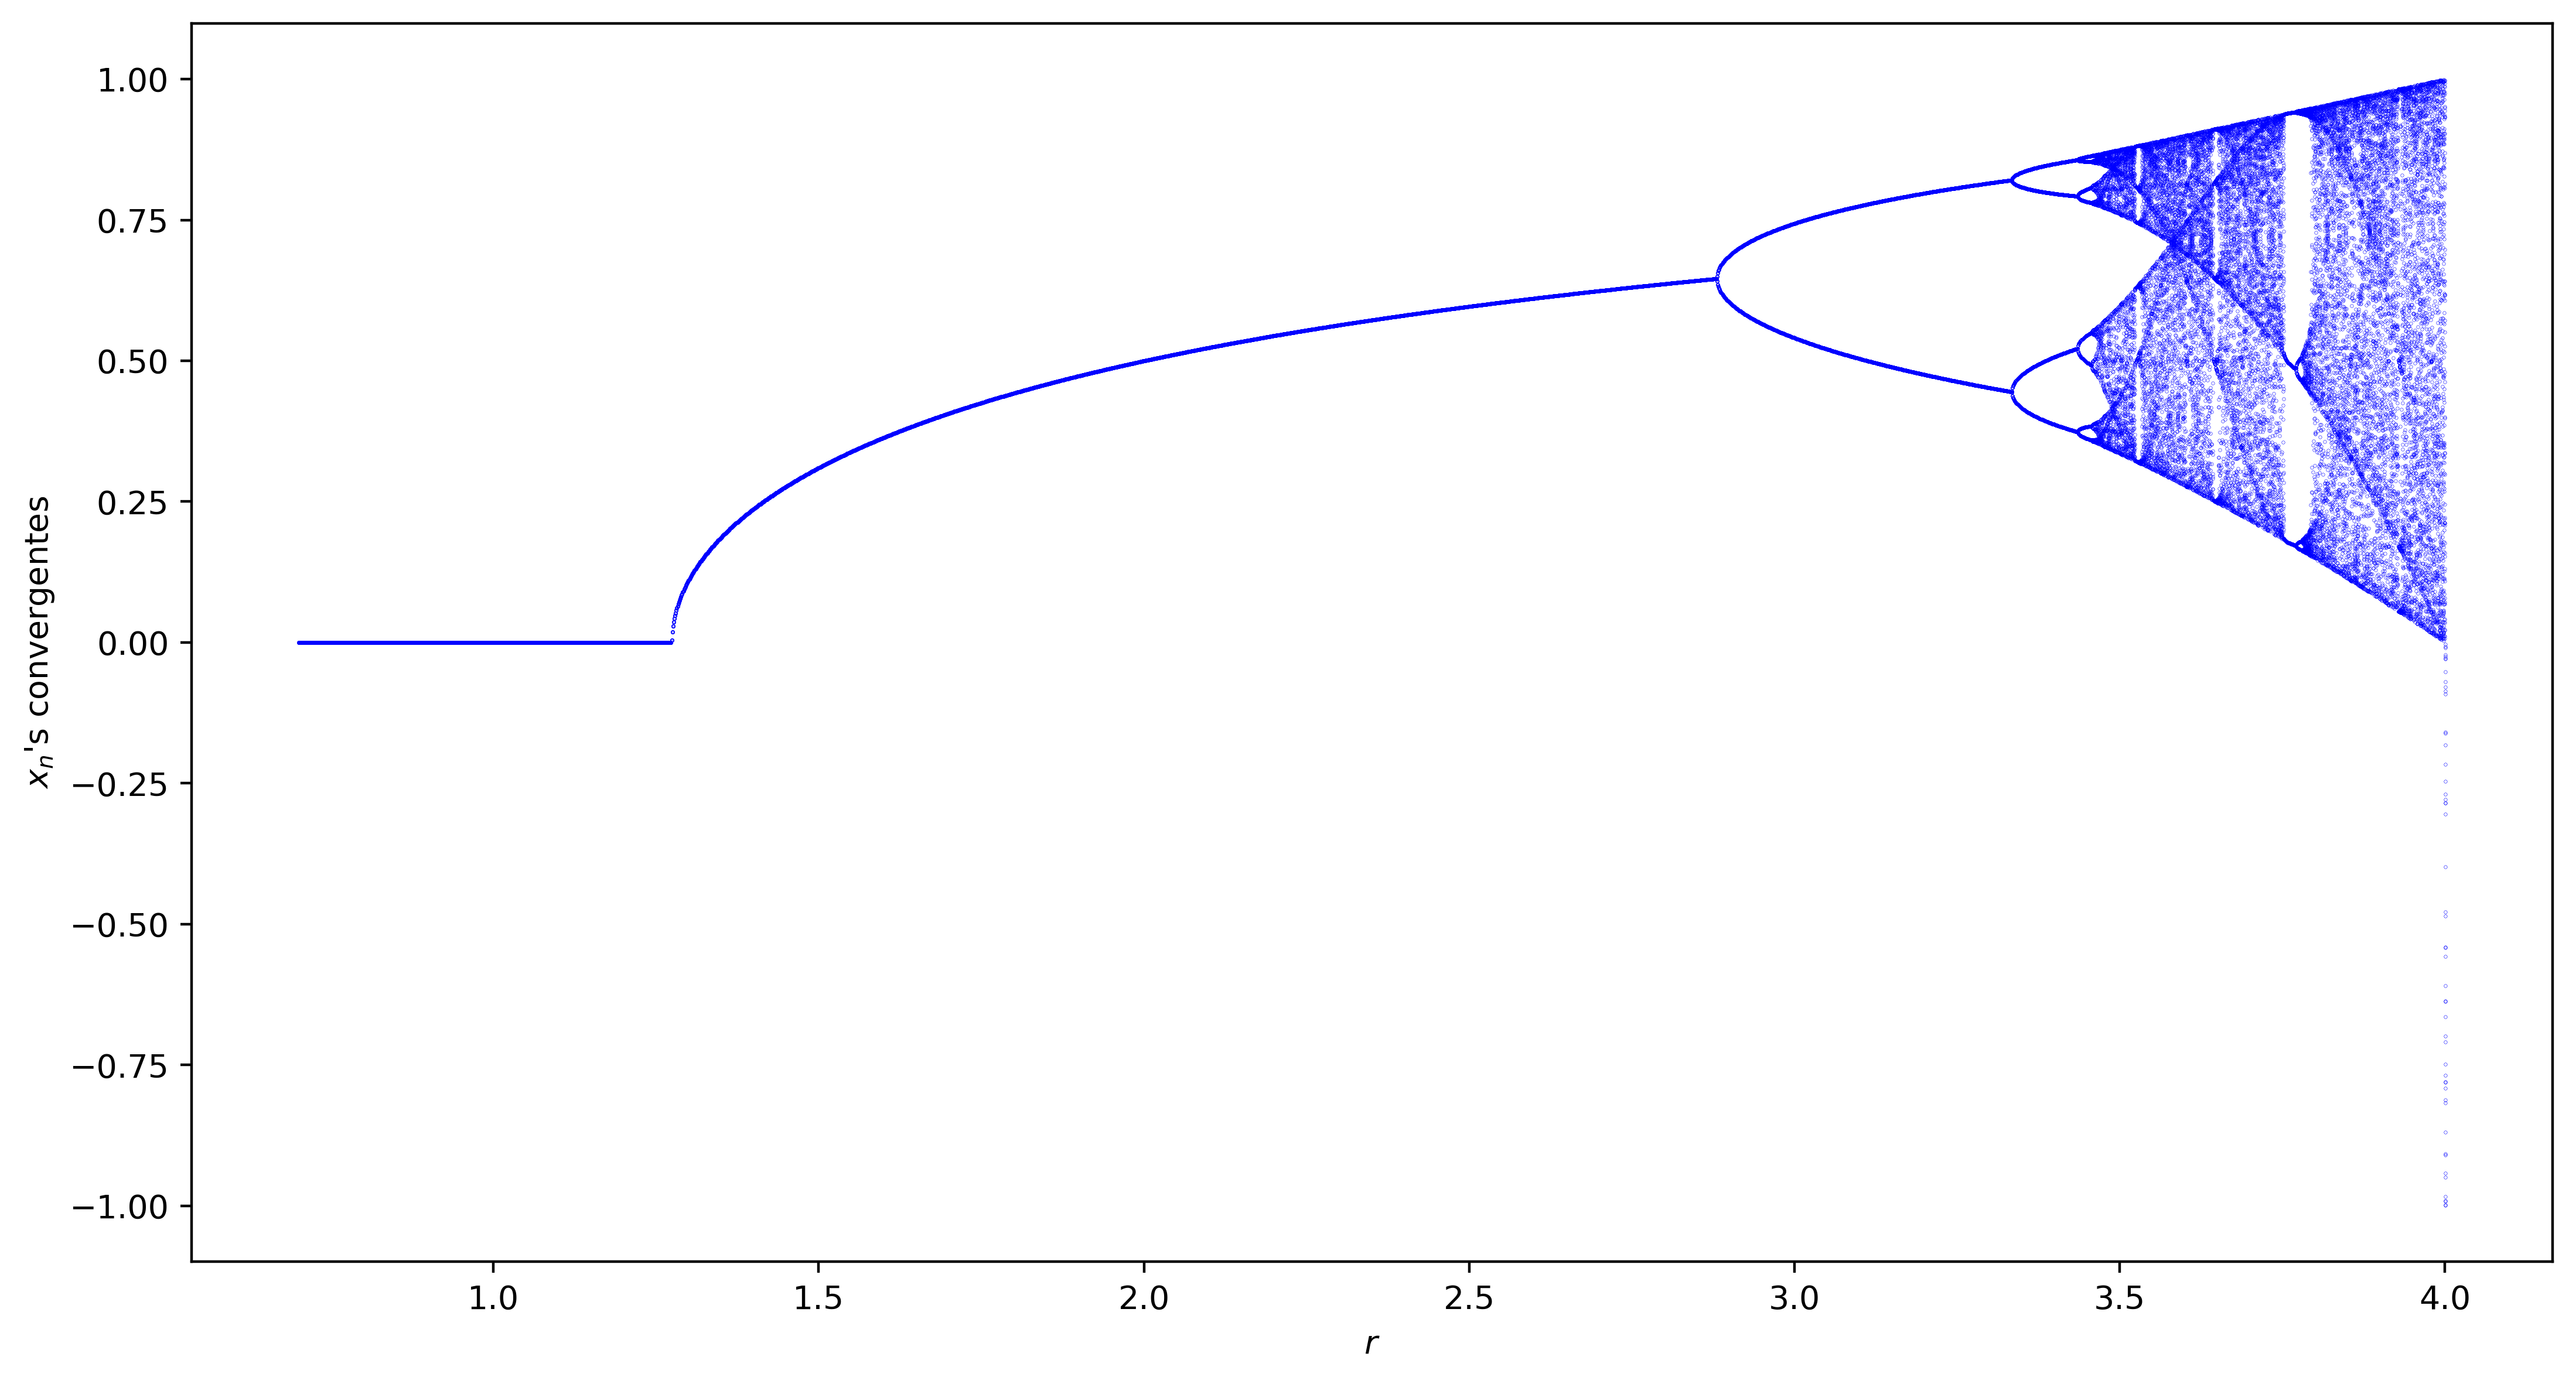

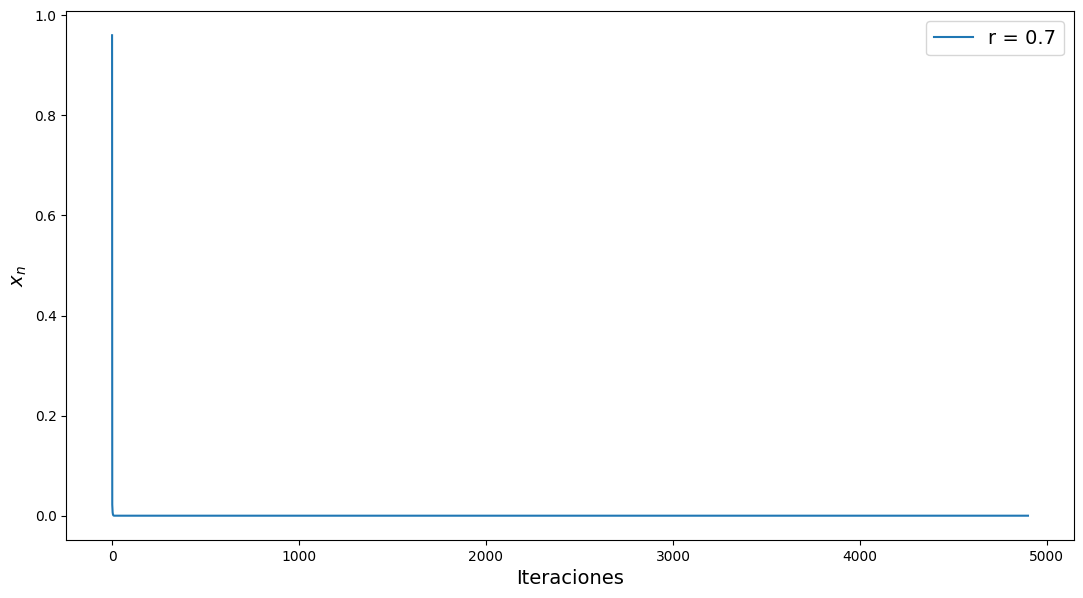

In [4]:
#@title Selección de valores{ run: "auto" }
Población = 0.96 #@param {type:"slider", min:0, max:1, step:0.01}
val_r = 0.7 #@param {type:"slider", min:0, max:4, step:0.1}
interactions = 4900 #@param {type:"slider", min:100, max:10000, step:100}


x0=Población  #Población inicial
n=interactions  #Número total de iteraciones
ultimos=50   #Términos que consideraremos para checar hacia donde converge la sucesión.

r=val_r
fig=plt.figure(figsize=(13,7), dpi=400)
while r<4: 
    xns=[x0]   #Lista donde se guardan los elementos de la sucesión.
    for i in range(n):
        xns.append((r/4)*sin(3.1416*xns[i]))
    r+=0.001
    xfinales=xns[n-ultimos:]    #Los ultimos 50 valores de la sucesión.
    rs=[r for xs in xfinales]    #Una lista con el valor de r actual repetido 50 veces.
    plt.scatter(rs, xfinales, c='b', marker='o', s=0.01)
    
plt.xlabel('$r$', fontsize=10)
plt.ylabel('$x_n$\'s convergentes', fontsize=10)
plt.savefig('diagrama_estabilidad_ec2.png')

#Diagrama de trayectorias
x0=Población 
n=interactions
r=val_r

fig=plt.figure(figsize=(13,7), dpi=100)
ordenadas=range(n)

xns=[x0]
for i in range(n-1):
  xns.append((r/4)*sin(3.1416*xns[i]))

plt.plot(ordenadas, xns, label=f'r = {r}')
plt.xlabel('Iteraciones', fontsize=14)
plt.ylabel('$x_n$', fontsize=14)
plt.legend(fontsize=14)
plt.savefig('diagrama_trayectoria_ec2.png')

###Diagrama de fases ecuación 1

*Ec. 1.
          x<sub>i+1</sub> = rx<sub>i</sub>(1 - x<sub>i</sub>)*

donde: 


*   x<sub>i</sub> = factor logistico (Población)
*   r = constante de crecimiento (val_r)

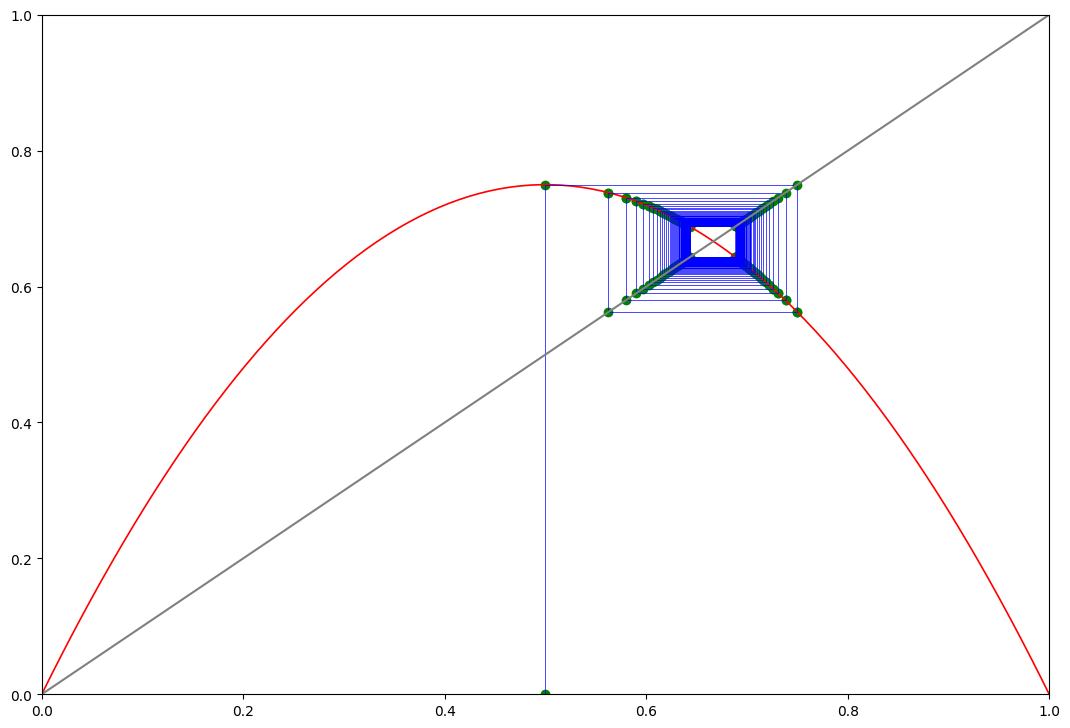

In [5]:
import numpy as np

#@title Selección de valores{ run: "auto" }
Población = 0.5 #@param {type:"slider", min:0, max:1, step:0.01}
val_r = 3 #@param {type:"slider", min:0, max:4, step:0.1}
interactions = 100 #@param {type:"slider", min:100, max:10000, step:100}

x0=Población  #Población inicial
n=interactions  #Numero total de iteraciones

def modelo(val_r, x0):
    return val_r * x0 * (1 - val_r)
    
def get_function_points(model, r, n, start, end):
    x_vals = np.linspace(start, end, n)
    y_vals = [model(x, r) for x in x_vals]
    return x_vals, y_vals

def get_points(model, r, x, n):
    global get_points
    global mix
    get_points = [(x, 0)]
    for _ in range(n):
        y1 = model(x, r)
        get_points.append((x, y1))
        get_points.append((y1, y1))
        y2 = model(y1, r)
        get_points.append((y1, y2))
        x = y1
    mix = zip(*get_points)
    out = np.array(get_points)
    return out[:,0], out[:,1]


fig=plt.figure(figsize=(13,9), dpi=100)
x_values, y_values = get_function_points(
                        model=modelo, r=val_r, n=n, start=0, end=1)

cobweb_x_vals, cobweb_y_vals = get_points(
                        model=modelo, r=val_r, x=x0, n=n)


plt.plot(x_values, y_values, linewidth=1.2, c='red')
plt.scatter(cobweb_x_vals, cobweb_y_vals, c='green')
plt.plot(cobweb_x_vals, cobweb_y_vals,linewidth=0.5, c='blue')
plt.plot((0,1), (0,1), c='gray')
plt.xlim((0,1))
plt.ylim((0,1))
plt.savefig('diagrama_fases_ec1.png')
plt.show()

##Análisis de resultados

*   Se desarrolla 3 aplicativos que satisface con los objetivo del trabajo práctico, los primeros 2 aplicativos permite obtener el diagrama de trayectorias y diagrama de estabilidad de la ecuación logística para 2 ecuaciones distintas, mientras que, el tercer aplicativo permite graficar el diagrama de fases para una sola ecuación.

*   El usuario puede interactuar con los aplicativos mediante scrollbars, donde se permite variar los parámetros de población, constante de crecimiento y número de interacciones. 

*   Las vistas de la ecuación logística son graficadas mediante la librería matplotlib, finalmente cada imagen es guardada con una dots per inch (pdi) de 100 o 300, lo que permite al usuario tener una alta resolución al momento de hacer zoom.